In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Mean Absolute Percentage Error
def calcula_mape(label, predictions):
    errors = np.abs(label - predictions)
    relative_errors = errors/np.abs(label)
    return np.mean(relative_errors) * 100


%matplotlib inline

df = pd.read_csv('insurance.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

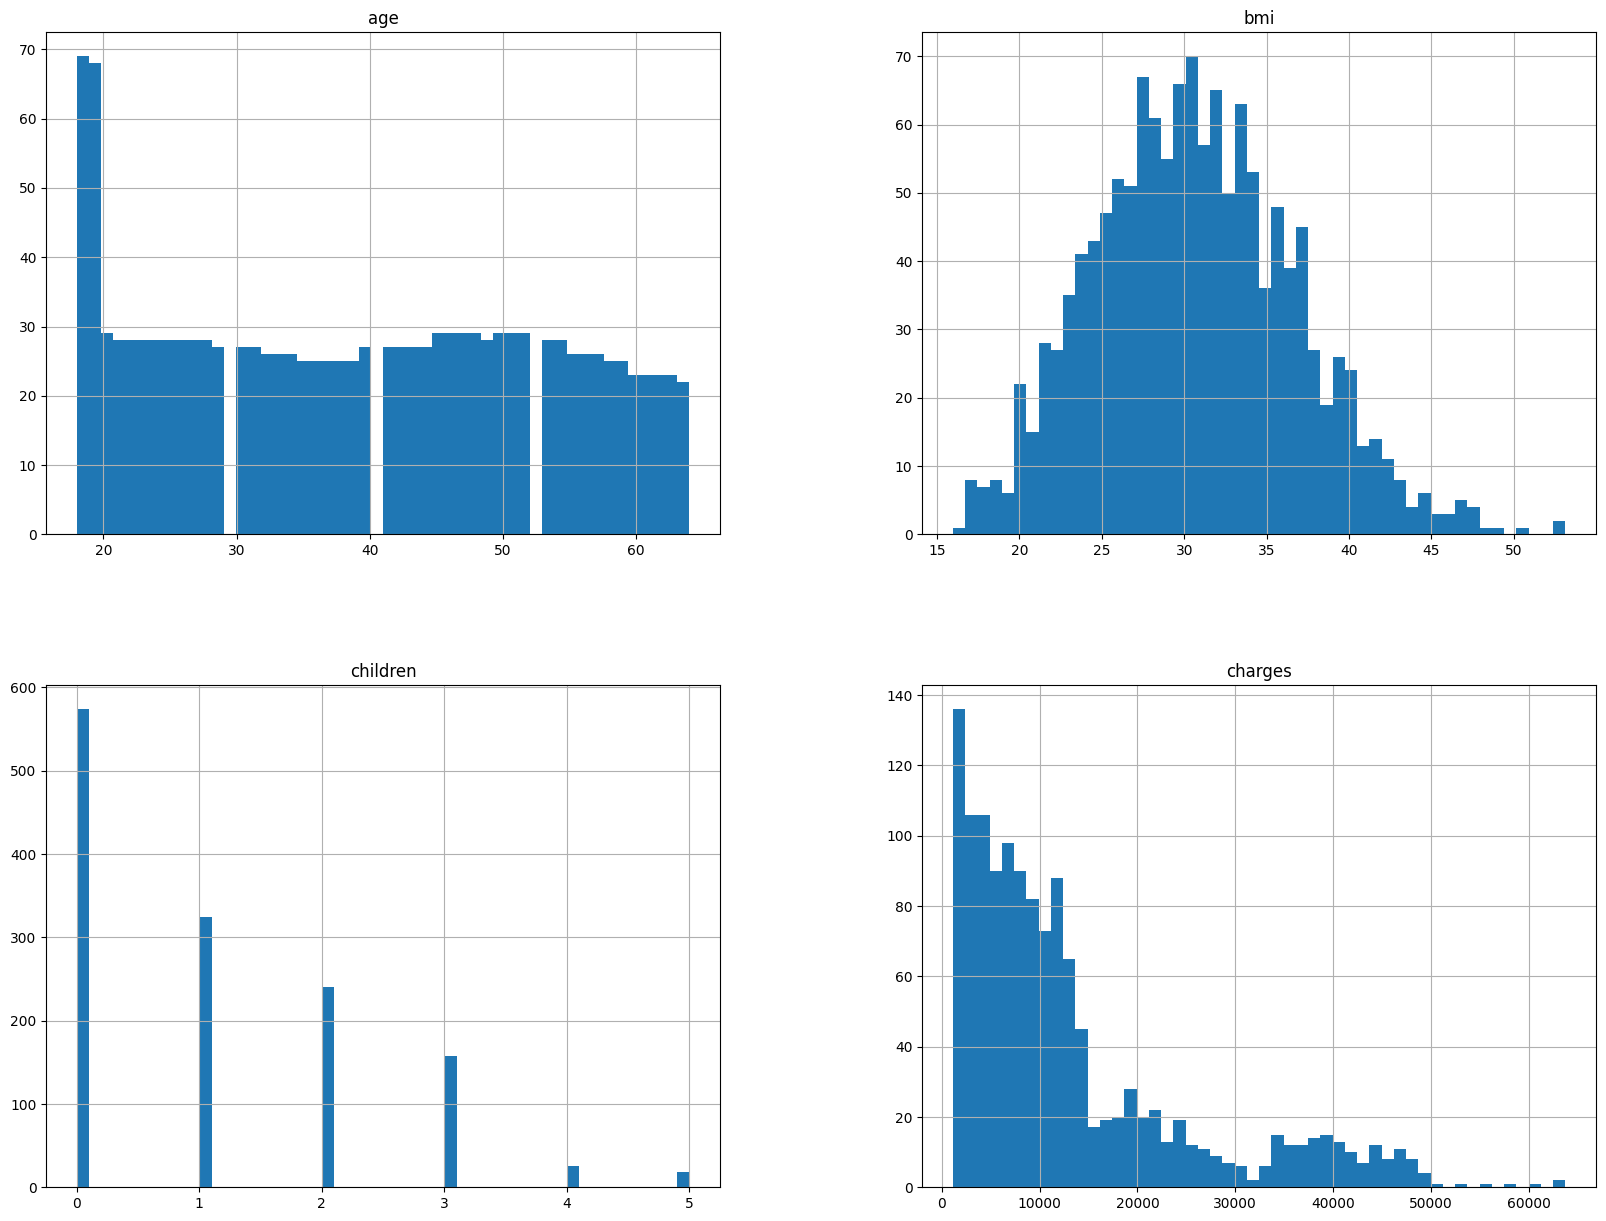

In [ ]:
df.hist(bins=50, figsize=(20,15))

Transformando os dados para análise

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: xlabel='bmi', ylabel='charges'>

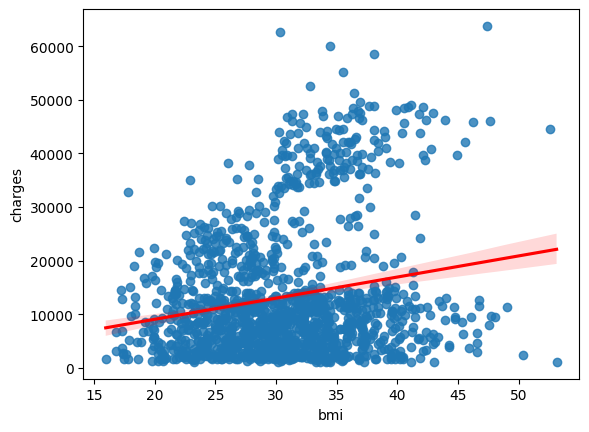

In [ ]:
sns.regplot(x='bmi', y='charges', data=df, line_kws={'color':'red'})

Distribuição Idade e Gastos

<Axes: xlabel='age', ylabel='charges'>

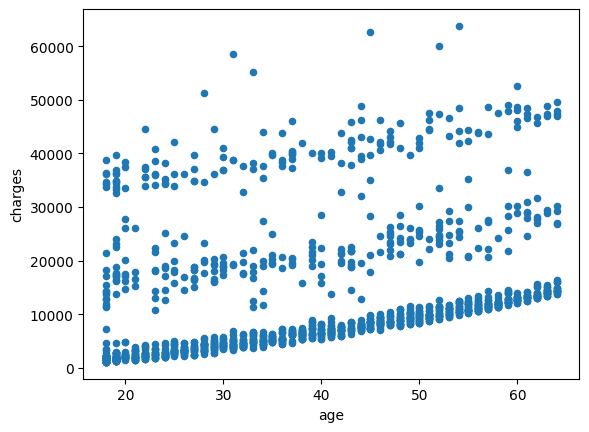

In [ ]:
df.plot.scatter(x='age', y='charges')

Gerando uma base de cópia para trabalho

In [ ]:
cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region','charges']
df_full = df[cols].copy()
df_full.head()
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
df_full

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


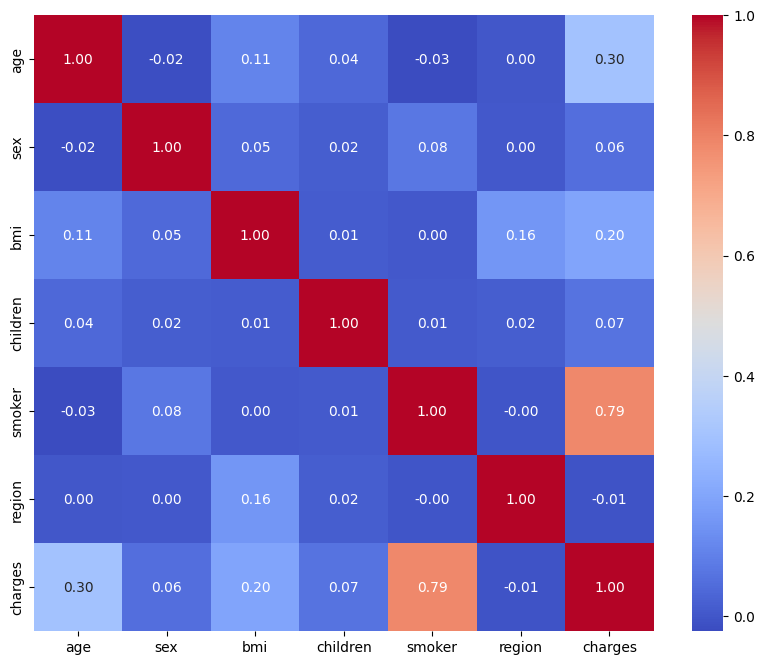

In [ ]:
corr_matriz = df_full.corr()
df_full.corr()
plt.figure(figsize=(10, 8))

# Criando o mapa de calor da matriz de correlação
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Separação dos dados entre os dois eixos (x e y)

In [ ]:
X = df_full.drop(columns="charges")
y = df_full['charges']

Geração dos dados de treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() #chamando o metodo de padronização dos dados (média e std)
scaler.fit(X_train)# qual média e std será utilizado para o escalonamento

x_train_standard_scaled = scaler.transform(X_train)
x_test_standard_scaled  = scaler.transform(X_test)

print(f"treino: {len(x_train_standard_scaled)}")
print(f"test: {len(x_test_standard_scaled)}")

treino: 1070
test: 268


Aplicando regressao linear

In [ ]:
lm = LinearRegression()
lm.fit(x_train_standard_scaled, y_train)

LinearRegression()

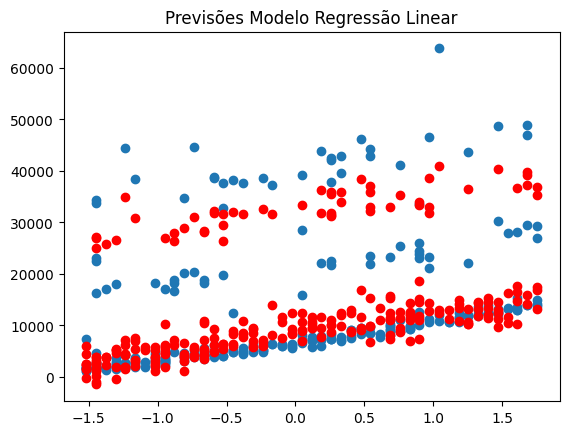

In [ ]:
lm.predict([
    [19, 0, 27.900, 1, 0,0]
])

lm_predictions = lm.predict(x_test_standard_scaled)
plt.title('Previsões Modelo Regressão Linear')
plt.scatter(x_test_standard_scaled[:, 0], y_test, label='Real')
plt.scatter(x_test_standard_scaled[:, 0], lm_predictions, label='Previsto', color='red')


Validação Modelo Regressao Linear

In [ ]:
# validação modelo Regressao Linear

# Quoeficiente de Determinacao
print('R^2: ', r2_score(y_test, lm_predictions))

# Erro médio absoluto
print('MAE: ', mean_absolute_error(y_test, lm_predictions))

# Erro medio quadratico
print('MSE: ', mean_squared_error(y_test, lm_predictions))

# Root Mean Squar Error (Erro quadrático médio) - Erro médio
print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm_predictions)))

# MAPE indica o percentual de erro do modelo
mape = calcula_mape(y_test, lm_predictions)
print(f"MAPE: {mape:.2f}%")


R^2:  0.7833463107364536
MAE:  4186.508898366436
MSE:  33635210.43117845
RMSE:  5799.5870914383595
MAPE: 47.09%


Usando Rige

In [ ]:
ridge = Ridge(alpha=1.0)  # O parâmetro alpha controla a força da regularização
ridge.fit(x_train_standard_scaled, y_train)


Ridge()

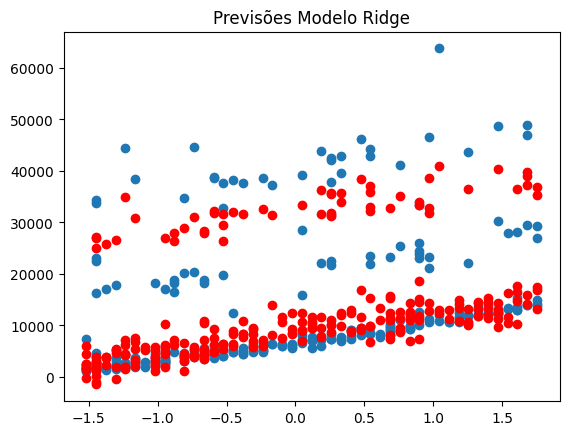

In [ ]:
# Previsões com Ridge
ridge_predictions = ridge.predict(x_test_standard_scaled)

plt.title('Previsões Modelo Ridge')
plt.scatter(x_test_standard_scaled[:, 0], y_test, label='Real')
plt.scatter(x_test_standard_scaled[:, 0], ridge_predictions, label='Previsto', color='red')


Validando modelo Ridge

In [ ]:
# Avaliação de Ridge

# Quoeficiente de Determinacao
print('R^2: ', r2_score(y_test, ridge_predictions))

# Erro médio absoluto
print("MAE: ", mean_absolute_error(y_test, ridge_predictions))

# Erro medio quadratico
print('MSE: ', mean_squared_error(y_test, ridge_predictions))

# Root Mean Squar Error (Erro quadrático médio) - Erro médio
print('RMSE: ', np.sqrt(mean_squared_error(y_test, ridge_predictions)))

# MAPE indica o percentual de erro do modelo
ridge_mape = calcula_mape(y_test, ridge_predictions)
print(f"MAPE: {ridge_mape:.2f}%")


R^2:  0.7833037457661384
MAE:  4187.971685427724
MSE:  33641818.58882587
RMSE:  5800.156772780014
MAPE: 47.13%


Modelo Lasso

In [ ]:
lasso = Lasso(alpha=0.01)  # O parâmetro alpha controla a força da regularização
lasso.fit(x_train_standard_scaled, y_train)


Lasso(alpha=0.01)

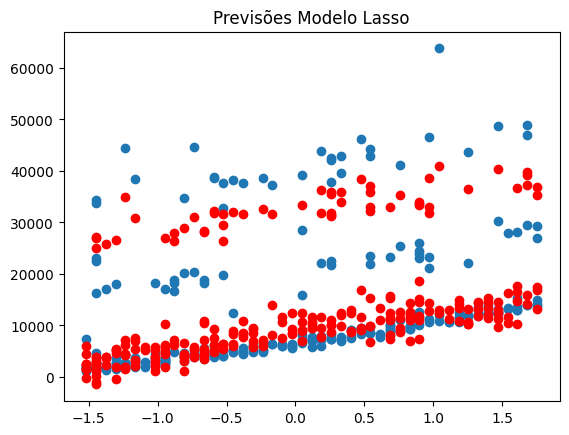

In [ ]:
# Predições com Lasso
lasso_predictions = lasso.predict(x_test_standard_scaled)

plt.title('Previsões Modelo Lasso')
plt.scatter(x_test_standard_scaled[:, 0], y_test, label='Real')
plt.scatter(x_test_standard_scaled[:, 0], lasso_predictions, label='Previsto', color='red')


In [ ]:
# Avaliação de Ridge

# Quoeficiente de Determinacao
print('R^2: ', r2_score(y_test, lasso_predictions))

# Erro médio absoluto
print("MAE: ", mean_absolute_error(y_test, lasso_predictions))

# Erro medio quadratico
print('MSE: ', mean_squared_error(y_test, lasso_predictions))

# Root Mean Squar Error (Erro quadrático médio) - Erro médio
print('RMSE: ', np.sqrt(mean_squared_error(y_test, lasso_predictions)))

# MAPE indica o percentual de erro do modelo
lasso_mape = calcula_mape(y_test, lasso_predictions)
print(f"MAPE: {lasso_mape:.2f}%")

R^2:  0.7833461418412857
MAE:  4186.509994456113
MSE:  33635236.651939005
RMSE:  5799.589352009244
MAPE: 47.09%


Usando Árvore de decisao

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_decision_tree = DecisionTreeRegressor(max_depth=5)
model_decision_tree.fit(x_train_standard_scaled, y_train)


DecisionTreeRegressor(max_depth=5)

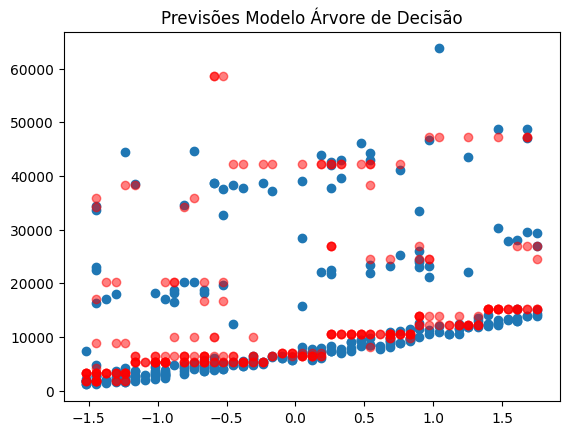

In [ ]:
tree_predictions = model_decision_tree.predict(x_test_standard_scaled)

plt.title('Previsões Modelo Árvore de Decisão')
plt.scatter(x_test_standard_scaled[:, 0], y_test, label='Real')
plt.scatter(x_test_standard_scaled[:, 0], tree_predictions, alpha=0.5, label='Previsto', color='red')


In [ ]:
# validando decision tree

# Quoeficiente de Determinacao
print('R^2: ', r2_score(y_test, tree_predictions))

# Erro médio absoluto
print('MAE: ', mean_absolute_error(y_test, tree_predictions))

# Erro medio quadratico
print('MSE: ', mean_squared_error(y_test, tree_predictions))

# Root Mean Squar Error (Erro quadrático médio) - Erro médio
print('RMSE: ', np.sqrt(mean_squared_error(y_test, tree_predictions)))

# MAPE indica o percentual de erro do modelo
mape = calcula_mape(y_test, tree_predictions)
print(f"MAPE: {mape:.2f}%")


R^2:  0.8309769670027721
MAE:  2919.196670680585
MSE:  26240611.4657118
RMSE:  5122.559073911379
MAPE: 33.85%


Usando Modelo Ramdom Forest - obtendo melhores métricas para o Ramdom Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

forest = RandomForestRegressor()

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

grid_search.fit(x_train_standard_scaled, y_train)

print("Melhores parâmetros encontrados:", grid_search.best_params_)
best_model = grid_search.best_estimator_

forest_predictions = best_model.predict(x_test_standard_scaled)

r2 = r2_score(y_test, forest_predictions)
print("Melhor R2 Score no conjunto de teste:", r2)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores parâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Melhor R2 Score no conjunto de teste: 0.8791183259917902


Grando a ML com Modelo Forest - aplicando as métricas indicadas pelo Grid no passo anterior

In [ ]:
forest2 = RandomForestRegressor(max_depth= 10, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 200)
forest2.fit(x_train_standard_scaled, y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)

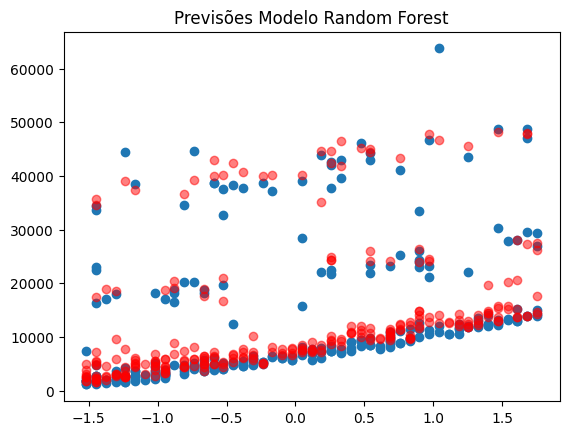

In [ ]:

forest2_predictions = forest2.predict(x_test_standard_scaled)

plt.title('Previsões Modelo Random Forest')
plt.scatter(x_test_standard_scaled[:, 0], y_test, label='Real')
plt.scatter(x_test_standard_scaled[:, 0], forest2_predictions, alpha=0.5, label='Previsto', color='red')


In [ ]:
# Validando modelo Forest

# Quoeficiente de Determinacao
print('R^2: ', r2_score(y_test, forest2_predictions))

# Erro médio absoluto
print('MAE: ', mean_absolute_error(y_test, forest2_predictions))

# Erro medio quadratico
print('MSE: ', mean_squared_error(y_test, forest2_predictions))

# Root Mean Squar Error (Erro quadrático médio) - Erro médio
print('RMSE: ', np.sqrt(mean_squared_error(y_test, forest2_predictions)))

# MAPE indica o percentual de erro do modelo
mape = calcula_mape(y_test, forest2_predictions)
print(f"MAPE: {mape:.2f}%")

R^2:  0.8777683957782882
MAE:  2422.391488406749
MSE:  18976301.50362526
RMSE:  4356.179691383869
MAPE: 27.69%
